In [ ]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

idx = pd.IndexSlice

In [ ]:
results_path = Path('5Min_ncut_05obsy_123day_lookahead_default_lookback')
if not results_path.exists():
    results_path.mkdir()

multiindex_cols = ['date', 'offset', 'ticker']

results = pd.read_feather(results_path / 'results.ftr').set_index(multiindex_cols).sort_index()
results

In [ ]:
data = pd.read_feather(results_path / 'data.ftr').set_index(multiindex_cols).sort_index()
data

rsi   bb_high    bb_low       NATR  \
date       offset ticker                                               
2013-05-03 10     btc-usd   45.195717  0.333876  0.226540  42.895950   
           15     btc-usd   44.996559  0.339432  0.227344  43.202477   
           20     btc-usd   44.665878  0.343619  0.223756  43.594116   
           25     btc-usd   44.785118  0.344467  0.227588  43.588852   
           30     btc-usd   44.907230  0.341647  0.224152  43.305061   
...                               ...       ...       ...        ...   
2021-06-20 865    xtz-usd   37.321785  0.268150 -0.006974  15.573627   
           870    algo-usd  39.315731  0.212823 -0.036147  13.992373   
                  chz-usd   42.134048  0.249972  0.110645  19.293007   
                  leo-usd   47.955723  0.118094  0.078177   8.692143   
                  wbtc-usd  37.396915  0.183451  0.016238  11.874786   

                                 ATR       PPO      MACD  sector       r01  \
date       offset ticker                                                     
2013-05-03 10     btc-usd  -0.460349  4.349795 -0.133858       0 -0.081482   
           15     btc-usd  -0.460884  4.068254 -0.134630       0 -0.065331   
           20     btc-usd  -0.461162  3.673091 -0.135154       0 -0.083011   
           25     btc-usd  -0.461271  3.307914 -0.135503       0 -0.074871   
           30     btc-usd  -0.461130  3.000095 -0.135549       0 -0.077694   
...                              ...       ...       ...     ...       ...   
2021-06-20 865    xtz-usd   1.150429 -6.237974 -1.917071       1 -0.084538   
           870    algo-usd  0.682024  1.954638 -0.619354       0 -0.070389   
                  chz-usd   1.036831  3.956850 -0.538907       2 -0.123368   
                  leo-usd   2.824224  1.499576 -0.429611       2 -0.032668   
                  wbtc-usd  1.280465  1.249398 -1.348212       2 -0.044022   

                                 r02  ...  r03dec  r01q_sector  r02q_sector  \
date       offset ticker              ...                                     
2013-05-03 10     btc-usd  -0.136415  ...     0.0          0.0          1.0   
           15     btc-usd  -0.146862  ...     0.0          0.0          1.0   
           20     btc-usd  -0.142226  ...     0.0          0.0          1.0   
           25     btc-usd  -0.139922  ...     0.0          0.0          1.0   
           30     btc-usd  -0.136460  ...     0.0          0.0          1.0   
...                              ...  ...     ...          ...          ...   
2021-06-20 865    xtz-usd  -0.133996  ...     2.0          1.0          1.0   
           870    algo-usd -0.121663  ...     1.0          1.0          1.0   
                  chz-usd  -0.183621  ...     1.0          0.0          0.0   
                  leo-usd  -0.027579  ...     2.0          2.0          2.0   
                  wbtc-usd -0.093304  ...     2.0          2.0          1.0   

                            r03q_sector   r01_fwd   r02_fwd   r03_fwd  year  \
date       offset ticker                                                      
2013-05-03 10     btc-usd           0.0  0.132056  0.175000  0.125605  2013   
           15     btc-usd           0.0  0.150816  0.179490  0.139388  2013   
           20     btc-usd           0.0  0.158610  0.205149  0.163234  2013   
           25     btc-usd           0.0  0.152595  0.191413  0.162582  2013   
           30     btc-usd           0.0  0.153925  0.192714  0.157307  2013   
...                                 ...       ...       ...       ...   ...   
2021-06-20 865    xtz-usd           2.0 -0.190210 -0.015421 -0.012735  2021   
           870    algo-usd          1.0 -0.174125  0.007268  0.009506  2021   
                  chz-usd           1.0 -0.225372 -0.014524 -0.005949  2021   
                  leo-usd           2.0 -0.051671 -0.003739 -0.010541  2021   
                  wbtc-usd          2.0 -0.083188  0.041487  0.058541  2021   

                          

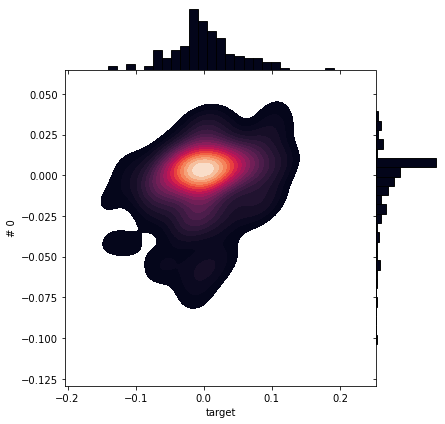

In [ ]:
j=0
year = '2021'
ticker='btc-usd'
g = sns.JointGrid(data=results.loc[idx[year:year, 0:1, ticker], :], x='target', y=f'#{j:2}', space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             #clip=((2200, 6800), (10, 25)),
             #thresh=0,
             levels=20,
             cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)
g.savefig(f'predictions_targets_net_#{j}_{year}.svg')


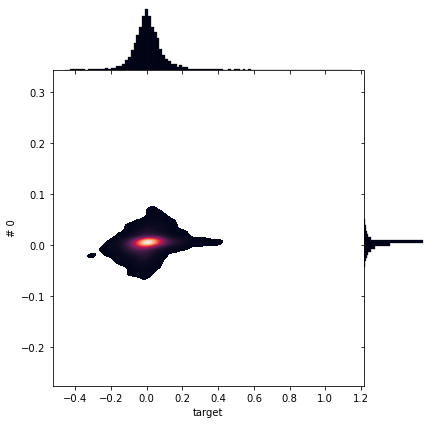

In [ ]:
j=0
year = '2021'
g = sns.JointGrid(data=results.loc[idx[year:year, 0:1, :], :], x='target', y=f'#{j:2}', space=0)
g.plot_joint(sns.kdeplot,
             fill=True,
             #clip=((-0.1, 0.1), (-0.1, 0.1)),
             #thresh=0,
             levels=100,
             cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=100)
g.savefig(f'predictions_targets_net_#{j}_{year}.svg')

In [ ]:
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=results.loc[idx[:, 0:1, :], :],
    x="target", y=f'#{j:2}', hue="year",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

KeyError: "['year'] not in index"

In [ ]:
tickers = results.index.get_level_values('ticker').unique()
for year in ['2018', '2020', '2021']:
    for j in range(3):
        fig, axs = plt.subplots(len(tickers), figsize=(100, 100))
        for i, ticker in enumerate(tickers):
            idx = pd.IndexSlice
            results.loc[idx[year:year, ticker, 0:1, ], 'target'].plot(ax=axs[i])
            results.loc[idx[year:year:, ticker, 0:1, ], f'#{j:2}'].plot(ax=axs[i])

        plt.savefig(f'factors_{j}_{year}.svg')



In [ ]:
results_ic = pd.read_feather(results_path / 'results_IC.ftr').set_index(['date', 'ticker', 'offset'])
ax = results_ic['ic_# 1'].plot(figsize=(12, 4),
                     label='Information Coefficient',
                     title='Validation Performance',
                    ylim=(0, .3))
results_ic['ic_# 1'].expanding().mean().plot(ax=ax, label='Cumulative Average')
plt.legend()
sns.despine()
plt.tight_layout()
plt.savefig(results_path / 'ic_plot.svg')